# Representacion de la señal pre y post ataque
## Grado en Ingeniería Informática. Universidad de Burgos
**Autor:** Alicia Olivares Gil

In [31]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #matplotlib.pyplot como plot
import pickle as pk
import loadData as ld

### Leer datos: 

In [32]:
with open('datos.pdd','rb') as f: 
    datos = pk.load(f) 

print(len(datos))
datos.head()

4722740


,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
3949519,2018-10-30 21:20:23,0.0,26.732673,28.712871,22.772277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949520,2018-10-30 21:20:23,0.0,25.742574,27.722772,21.782178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949521,2018-10-30 21:20:23,0.0,24.752475,26.732673,21.782178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949522,2018-10-30 21:20:24,0.0,25.742574,27.722772,22.772277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3949524,2018-10-30 21:20:25,0.0,24.752475,27.722772,22.772277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [33]:
with open('datosEstadisticos.pdd','rb') as f: 
    datosEstadisticos = pk.load(f) 

print(len(datosEstadisticos))
datosEstadisticos.head()

4722716


,DateTime,target,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
3949544,2018-10-30 21:20:41,False,0.0,25.108911,28.118812,23.168317,0.0,0.0,0.0,0.0,...,1.309778,1.400211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949543,2018-10-30 21:20:41,False,0.0,24.950495,28.039604,23.128713,0.0,0.0,0.0,0.0,...,1.332042,1.425651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949545,2018-10-30 21:20:42,False,0.0,24.831683,28.000000,23.128713,0.0,0.0,0.0,0.0,...,1.356351,1.425651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949546,2018-10-30 21:20:43,False,0.0,24.752475,28.000000,23.168317,0.0,0.0,0.0,0.0,...,1.356351,1.400211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949547,2018-10-30 21:20:44,False,0.0,24.594059,27.960396,23.128713,0.0,0.0,0.0,0.0,...,1.379048,1.425651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Filtrar momentos antes y después del ataque 

In [34]:
inicio =pd.to_datetime('2018-11-10 3:00:00')
fin = pd.to_datetime('2018-11-10 4:10:00')

datosAtaque = datos.loc[datos['DateTime']>inicio]
datosAtaque = datosAtaque.loc[datosAtaque['DateTime']<fin]

print(len(datosAtaque))
datosAtaque.head()

10495


,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
2002671,2018-11-10 03:00:01,6.930693,30.693069,22.772277,25.742574,25.742574,17.821782,0.0,0.0,0.0,0.0,0.0,0.0,False
2002672,2018-11-10 03:00:01,6.930693,29.702970,22.772277,26.732673,25.742574,18.811881,0.0,0.0,0.0,0.0,0.0,0.0,False
2002673,2018-11-10 03:00:01,6.930693,30.693069,21.782178,26.732673,25.742574,18.811881,0.0,0.0,0.0,0.0,0.0,0.0,False
2002674,2018-11-10 03:00:02,6.930693,29.702970,21.782178,26.732673,25.742574,18.811881,0.0,0.0,0.0,0.0,0.0,0.0,False
2002675,2018-11-10 03:00:02,6.930693,30.693069,22.772277,25.742574,25.742574,18.811881,0.0,0.0,0.0,0.0,0.0,0.0,False


In [35]:
datosEstadisticosAtaque = datosEstadisticos.loc[datosEstadisticos['DateTime']>inicio]
datosEstadisticosAtaque = datosEstadisticosAtaque.loc[datosEstadisticosAtaque['DateTime']<fin]

print(len(datosEstadisticosAtaque))
datosEstadisticosAtaque.head()

10495


,DateTime,target,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
2002671,2018-11-10 03:00:01,False,7.049505,30.732673,22.257426,26.613861,26.257426,18.653465,0.0,0.0,...,0.580145,0.594059,0.646730,0.548292,0.0,0.0,0.0,0.0,8.429370e-08,0.0
2002672,2018-11-10 03:00:01,False,7.049505,30.693069,22.297030,26.613861,26.217822,18.653465,0.0,0.0,...,0.580145,0.594059,0.646730,0.548292,0.0,0.0,0.0,0.0,8.429370e-08,0.0
2002673,2018-11-10 03:00:01,False,7.009901,30.693069,22.257426,26.574257,26.178218,18.613861,0.0,0.0,...,0.580145,0.548292,0.644199,0.495050,0.0,0.0,0.0,0.0,8.429370e-08,0.0
2002674,2018-11-10 03:00:02,False,7.009901,30.693069,22.257426,26.574257,26.178218,18.613861,0.0,0.0,...,0.580145,0.548292,0.644199,0.495050,0.0,0.0,0.0,0.0,8.429370e-08,0.0
2002675,2018-11-10 03:00:02,False,7.009901,30.693069,22.297030,26.534653,26.138614,18.613861,0.0,0.0,...,0.580145,0.571634,0.639106,0.495050,0.0,0.0,0.0,0.0,8.429370e-08,0.0


### Representar momentos antes del ataque: 

In [36]:
datosTargetTrue = datosAtaque.loc[datosAtaque['target'] == True]
datosEstadisticosTargetTrue = datosEstadisticosAtaque.loc[datosEstadisticosAtaque['target'] == True]

In [37]:
lw=0.5 #grosor de línea 

date_time = np.transpose(datosAtaque['DateTime'])
date_time_mean = np.transpose(datosEstadisticosAtaque['DateTime'])

date_time_true = np.transpose(datosTargetTrue['DateTime'])
date_time_mean_true = np.transpose(datosEstadisticosTargetTrue['DateTime'])

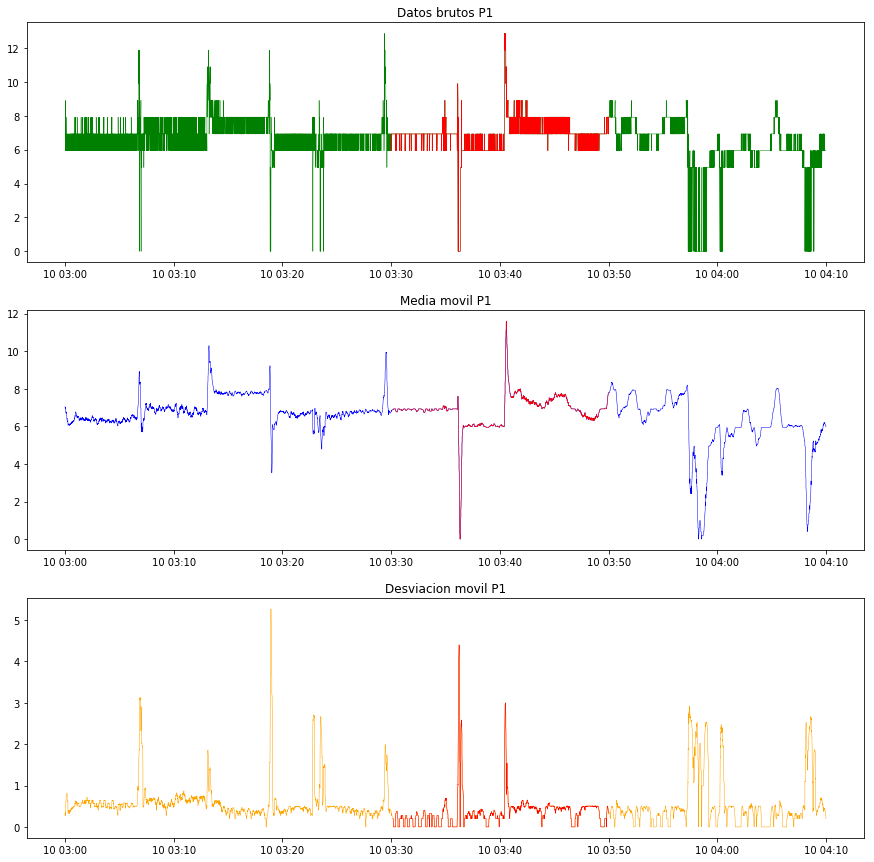

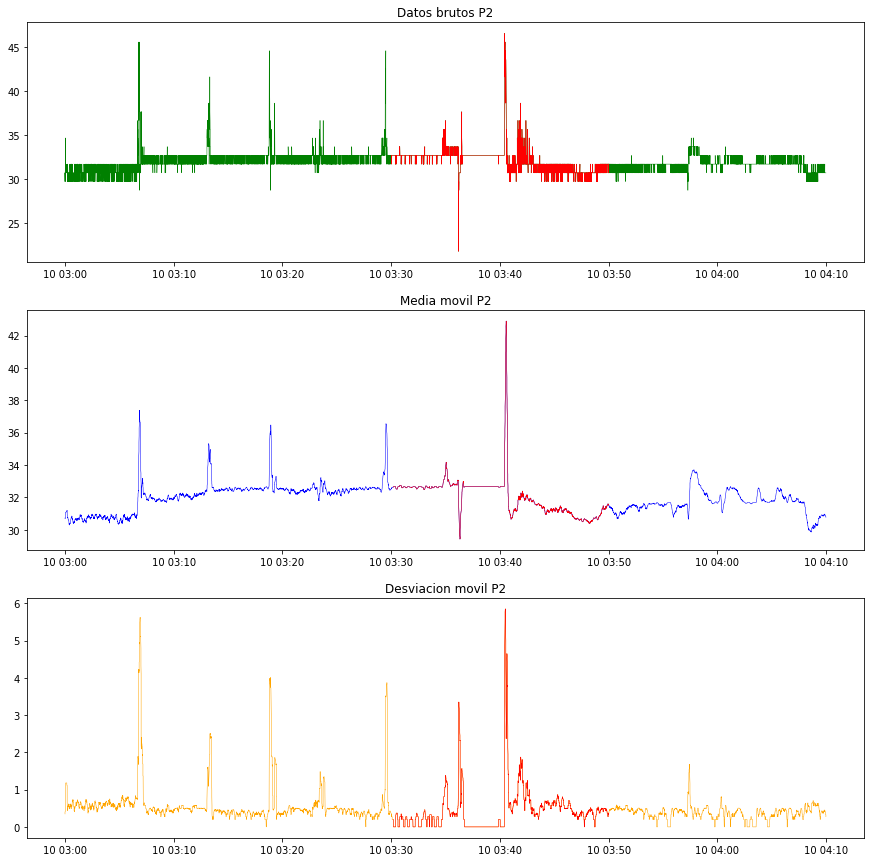

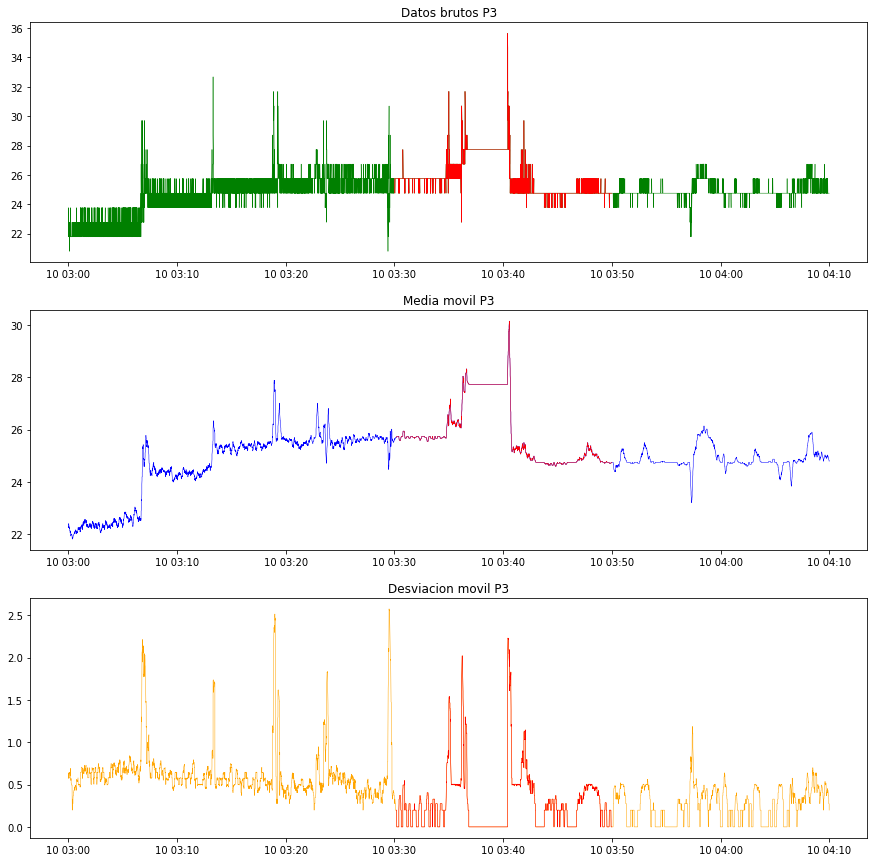

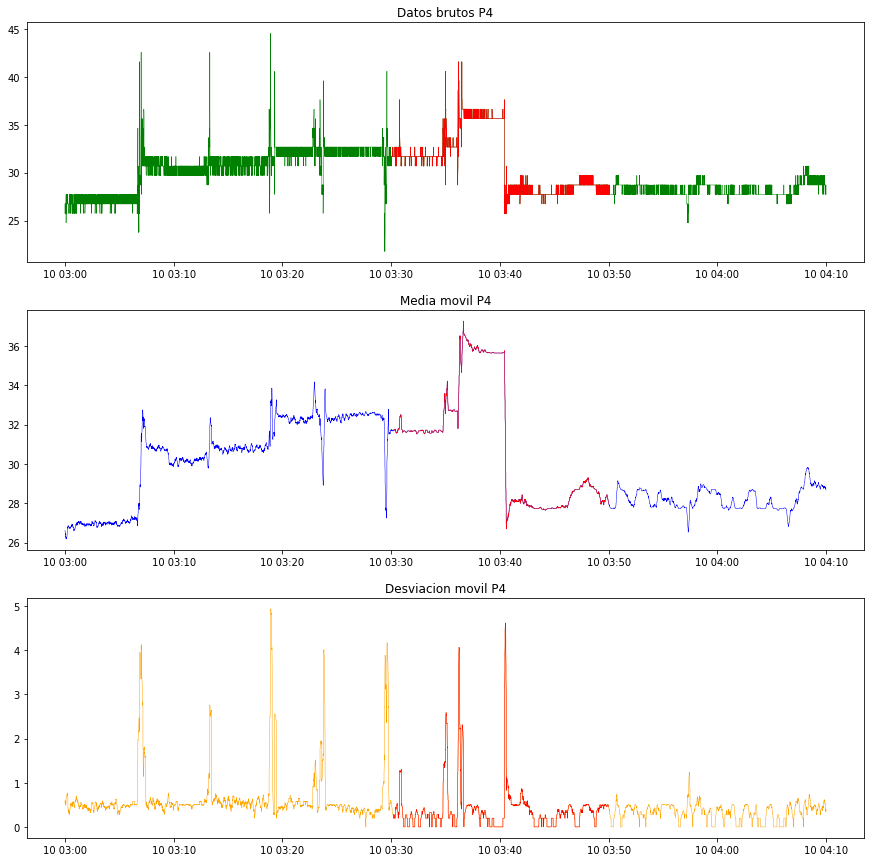

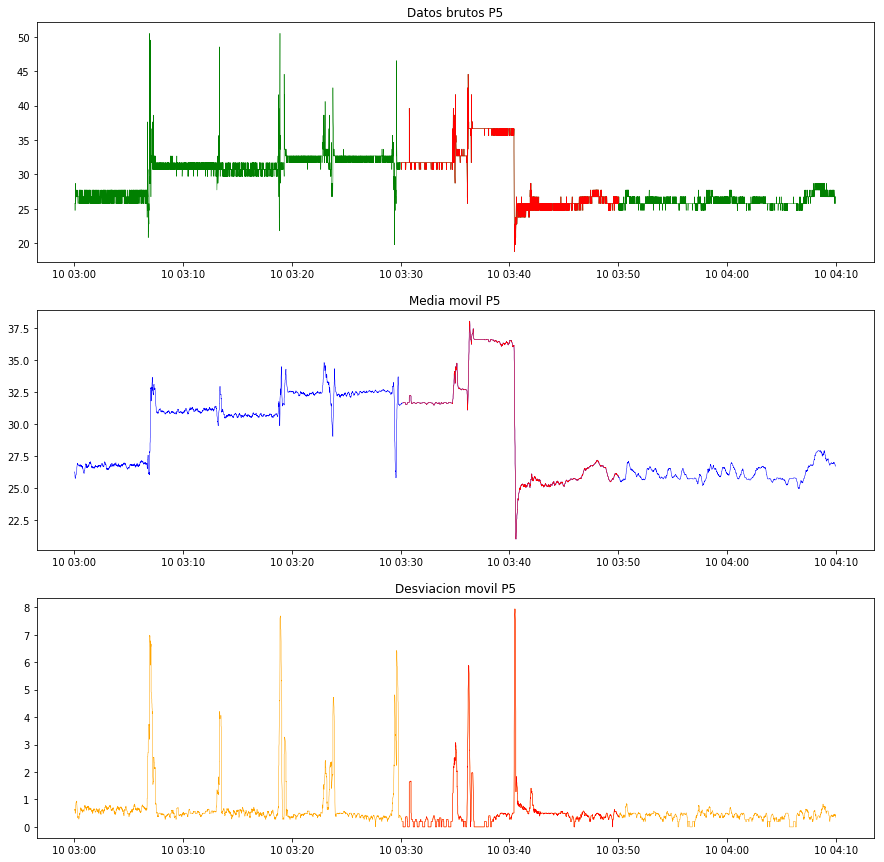

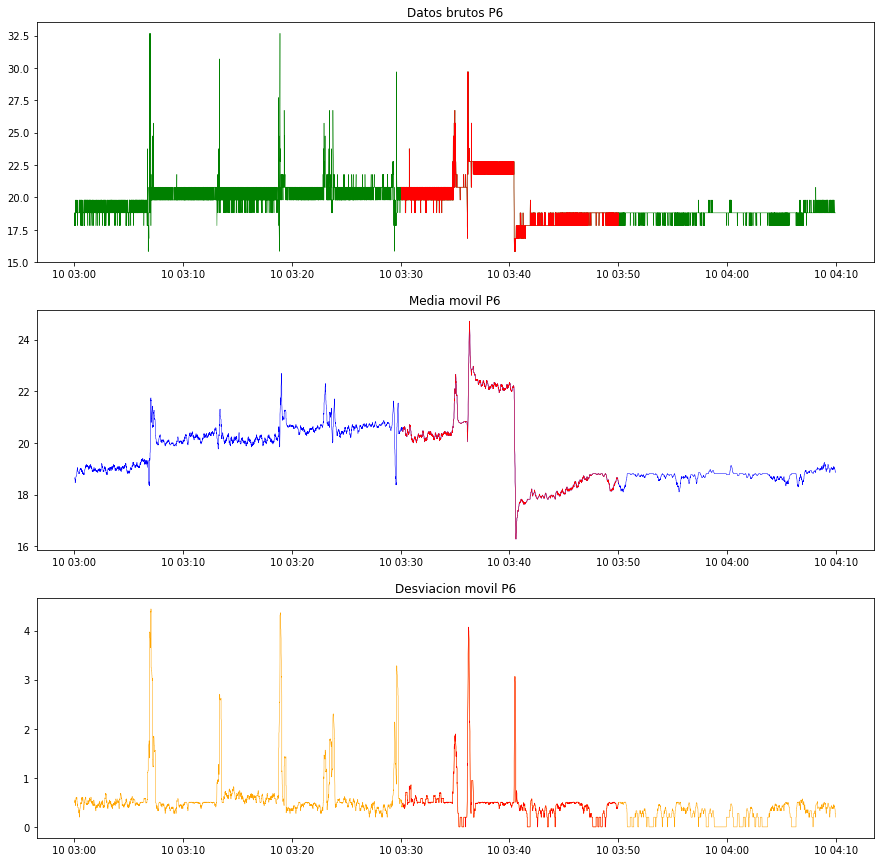

In [40]:
for i in range(1,7):  
    nombre_col = 'P'+str(i)
    nombre_col_mean = nombre_col+' mean'
    nombre_col_std = nombre_col+' std'
    dato = np.transpose(datosAtaque[nombre_col])
    dato_mean = np.transpose(datosEstadisticosAtaque[nombre_col_mean])
    dato_std = np.transpose(datosEstadisticosAtaque[nombre_col_std])
    
    dato_true = np.transpose(datosTargetTrue[nombre_col])
    dato_mean_true = np.transpose(datosEstadisticosTargetTrue[nombre_col_mean])
    dato_std_true = np.transpose(datosEstadisticosTargetTrue[nombre_col_std])

    plt.figure(figsize=(15,15))
    plt.subplot(311)
    plt.plot(date_time, dato, linewidth=lw, c='g')
    plt.plot(date_time_true, dato_true, linewidth=lw, c='r' )
    plt.title("Datos brutos "+nombre_col)
    plt.subplot(312)
    plt.plot(date_time_mean, dato_mean, linewidth=lw, c='b')
    plt.plot(date_time_mean_true, dato_mean_true, linewidth=lw, c='r')
    plt.title("Media movil "+nombre_col)
    plt.subplot(313)
    plt.plot(date_time_mean, dato_std, linewidth=lw, c='orange')
    plt.plot(date_time_mean_true, dato_std_true, linewidth = lw, c='r')
    plt.title("Desviacion movil "+nombre_col)